# Decision Tree
## Decision Tree Visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [3]:
data = load_iris()

In [4]:
model = DecisionTreeClassifier()

# Pass the data roughly 
model.fit(data.data,data.target)

DecisionTreeClassifier()

In [5]:
from sklearn import tree

In [6]:
plt.figure(figsize=(15,10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

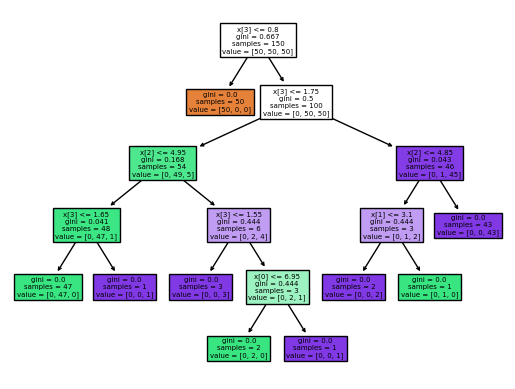

In [7]:
tree.plot_tree(model,filled=True)

## Decision Tree Regressor

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

In [9]:
# Set seed for reproducibility
np.random.seed(40)

# Example dataset
X = np.random.rand(100, 5)
y = np.random.rand(100)

In [10]:
X.shape,y.shape

((100, 5), (100,))

In [11]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Parameters for Decision Tree

#### 1. **`max_depth`**
   - **Purpose**: Controls the maximum depth of the tree.
   - **Values**:
     - `None`: The tree will grow until all leaves are pure or until it contains fewer than `min_samples_split` samples.
     - `10`, `20`, `30`: Limits the tree depth to the specified value, which helps prevent overfitting. Lower values result in shallower trees that may underfit the data, while higher values can capture more complexity.

#### 2. **`min_samples_split`**
   - **Purpose**: The minimum number of samples required to split an internal node.
   - **Values**:
     - `2`: The default value. Nodes with at least 2 samples will be split.
     - `5`, `10`: Higher values prevent the model from learning overly specific patterns, reducing the chance of overfitting by requiring larger splits.

#### 3. **`min_samples_leaf`**
   - **Purpose**: The minimum number of samples required to be at a leaf node.
   - **Values**:
     - `1`: The default value. A leaf node can contain only one sample.
     - `2`, `4`: Higher values can smooth the model and help avoid learning noise in the data by requiring leaves to have more samples.

#### 4. **`max_features`**
   - **Purpose**: The number of features to consider when looking for the best split.
   - **Values**:
     - `None`: Considers all features for splitting at each node.
     - `'auto'`: Uses the square root of the total number of features. (For classification: `sqrt(n_features)`; for regression: `n_features`)
     - `'sqrt'`: Also the square root of the total number of features, similar to `'auto'`.
     - `'log2'`: Uses the logarithm (base 2) of the total number of features, which can create more diverse trees.

### Summary:
These parameters are tuned to control the complexity and generalization of the Decision Tree model. Lowering tree depth (`max_depth`), increasing the minimum samples required to split or be in a leaf (`min_samples_split`, `min_samples_leaf`), and limiting the features considered (`max_features`) are all ways to reduce overfitting and improve model performance on unseen data. Conversely, allowing more flexibility in these parameters can make the model more expressive, capturing more details of the training data but risking overfitting.

In [12]:
# Creating the model for understanding
# regressor = DecisionTreeRegressor(max_depth=None,min_samples_split=20,min_samples_leaf=10)
# regressor.fit(X_train,y_train)

In [13]:
# plt.figure(figsize=(15,10))
# tree.plot_tree(regressor,filled=True)

In [14]:
# Creating the model
regressor = DecisionTreeRegressor()

In [15]:
# Defining the hyperparameters grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

In [16]:
# Performing GridSearchCV
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

C:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
132 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Anaconda\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_para

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [17]:
# Best model and its hyperparameters
best_regressor = grid_search.best_estimator_
print(best_regressor)
print("Best Parameters:", grid_search.best_params_)

DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=10)
Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [18]:
# Making predictions
y_pred = grid_search.predict(X_test)

In [19]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.10913998505413136


### This also Applicable:
#### 1. **First Code Snippet**

```python
# Best model and its hyperparameters
best_regressor = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Making predictions
y_pred = best_regressor.predict(X_test)
```

- **Explanation**:
  - After performing `GridSearchCV`, you access the best model found (`best_estimator_`) and explicitly store it in the `best_regressor` variable.
  - You then use this best model to make predictions.
  - This approach is more explicit and provides clarity by making it clear that you're using the best model for predictions.

#### 2. **Second Code Snippet**

```python
# Performing GridSearchCV
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Making predictions
y_pred = grid_search.predict(X_test)
```

- **Explanation**:
  - Here, you're directly using the `GridSearchCV` object (`grid_search`) to make predictions with the best model.
  - The `grid_search.predict(X_test)` method internally uses the best model found during the grid search.
  - This approach is more concise since it skips the step of explicitly extracting the best model, but it may be less clear to someone reading the code.

### Which One to Use?

- **Explicit Approach (First Snippet)**: If you prefer clarity and want to explicitly see and store the best model found, the first approach is better. It’s also useful if you need to reuse the best model in other parts of your code.
  
- **Concise Approach (Second Snippet)**: If you prefer brevity and don’t need to store the best model separately, the second approach is more concise and can be used directly.

In summary, both are correct, but the first approach is generally preferred for clarity and explicitness, especially in more complex projects where the best model might be reused or further analyzed.

## Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Example dataset
X = np.random.rand(100, 5)
y = np.random.randint(0, 2, 100)

In [21]:
X,y

(array([[0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864],
        [0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258],
        [0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497],
        [0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914],
        [0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998],
        [0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041],
        [0.60754485, 0.17052412, 0.06505159, 0.94888554, 0.96563203],
        [0.80839735, 0.30461377, 0.09767211, 0.68423303, 0.44015249],
        [0.12203823, 0.49517691, 0.03438852, 0.9093204 , 0.25877998],
        [0.66252228, 0.31171108, 0.52006802, 0.54671028, 0.18485446],
        [0.96958463, 0.77513282, 0.93949894, 0.89482735, 0.59789998],
        [0.92187424, 0.0884925 , 0.19598286, 0.04522729, 0.32533033],
        [0.38867729, 0.27134903, 0.82873751, 0.35675333, 0.28093451],
        [0.54269608, 0.14092422, 0.80219698, 0.07455064, 0.98688694],
        [0.77224477,

In [22]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Creating the model
classifier = DecisionTreeClassifier()

In [24]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

In [25]:
# Performing GridSearchCV
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

C:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
360 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
279 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Anaconda\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_par

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [26]:
# This approch is similar to First code snippet above this also applicable
# Best model and its hyperparameters
best_classifier = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}


In [27]:
# Making predictions
y_pred = best_classifier.predict(X_test)

In [28]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.55


Pre-Pruning and Post-Pruning is applied using max_depth,max_leaf hyperparameter

#### Prepared By,
Ahamed Basith